<a href="https://colab.research.google.com/github/caseyberger/mathmethods/blob/master/Phys631Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Inner Products and Basis Vectors in Quantum Mechanics

##Example from Quantum Mechanics: the Infinite Square Well

### Deriving the square well energy states

Consider a particle of mass $m$ constrained by the following potential in a box of length $L$:
\begin{equation}
V(x) =  \begin{cases} 
      +\infty & x < 0 \\
      0 & 0\leq x\leq L\\
      +\infty & x > L 
   \end{cases}
\end{equation}
We seek the allowed energy states for this particle.

To do this, we can solve the Schrödinger equation:
\begin{equation}
\hat{H} \Psi = E \Psi
\end{equation}
where
\begin{equation}
\hat{H} = - \frac{\hbar^{2}}{2 m}\hat{p}^{2} + V(x) = -  \frac{\hbar^{2}}{2 m}\frac{d^{2}}{dx^{2}} + V(x)
\end{equation}

Our potential is piecewise, so this means we need to solve the equation in 3 different regions.

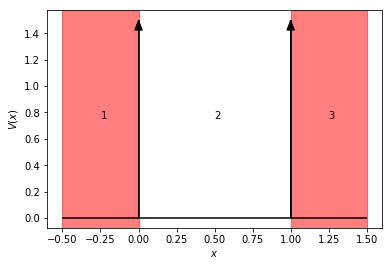

In [4]:
#plot the potential and label the three regions

#set the length of the box
L = 1.

#define x
x = np.linspace(0,L,100)

#plot the box
plt.hlines(y=0,xmin=-0.5,xmax=L+0.5,color="black")
plt.vlines(x=0,ymin=0.,ymax=1.5,color="black")
plt.axvspan(-0.5, 0, alpha=0.5, color='red')
plt.vlines(x=L,ymin=0.,ymax=1.5,color="black")
plt.arrow(L,0.,0,1.5,length_includes_head = True, head_width = 0.05,color="black")
plt.arrow(0.,0.,0,1.5,length_includes_head = True, head_width = 0.05,color="black")
plt.axvspan(L, L+0.5, alpha=0.5, color='red')
plt.text(-0.25, 0.75, "1")
plt.text(0.5, 0.75, "2")
plt.text(L+0.25, 0.75, "3")
plt.ylabel("$V(x)$")
plt.xlabel("$x$")
plt.show()

Let's solve for $\Psi$ in our three regions. 


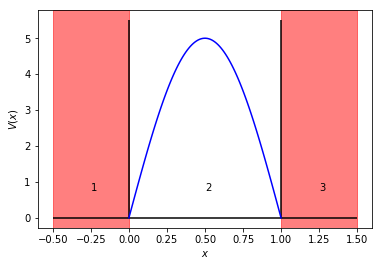

In [5]:
#plot the solution so far, for n = 1
#set the length of the box
L = 1.

#set the value of alpha
A = 5.

#define x
x = np.linspace(0,L,100)

#plot the box
plt.hlines(y=0,xmin=-0.5,xmax=L+0.5,color="black")
plt.vlines(x=0,ymin=0.,ymax=1.1*A,color="black")
plt.axvspan(-0.5, 0, alpha=0.5, color='red')
plt.vlines(x=L,ymin=0.,ymax =1.1*A,color="black")
plt.axvspan(L, L+0.5, alpha=0.5, color='red')
plt.plot(x,A*np.sin(np.pi*x/L),color = "blue")
plt.text(-0.25, 0.75, "1")
plt.text(0.5, 0.75, "2")
plt.text(L+0.25, 0.75, "3")
plt.ylabel("$V(x)$")
plt.xlabel("$x$")
plt.show()

**Some questions about this wave function**

 - These energy wavefunctions (states) form an orthonormal basis set. What does this mean?
 - What inner product would you use for this vector space?
 - What is the dimension of this vector space?
 - **Optional** show that the inner product of two different basis vectors is zero (hint: use trig identities)


How do we determine $\alpha$?


###Plot the solutions for the energy of a particle in an infinite square well 

First, set our parameters and define the solutions we solved

In [0]:
#set values for m, hbar, L
m = 1.
h = 1.
L = 1.

#define the wave function for state n as a function of x
def phi(n,x):
  return np.sqrt(2./L)*np.sin(n*np.pi*x/L)

#define the energy for state n
def E(n):
  return (np.pi*n*h)**2/(2*m*(L**2))

Next, we need to define our system for the plotting. Set our possible x values, then plot the functions we defined above.

Add some more basis vectors to the plot.

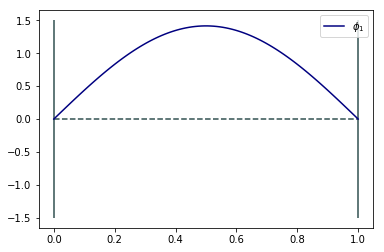

In [7]:
#define x
x = np.linspace(0,L,100)

#plot the box
plt.hlines(y=0,xmin=0,xmax=L,linestyle = "--",color="darkslategrey")
plt.vlines(x=0,ymin=-1.5,ymax=1.5,color="darkslategrey")
plt.vlines(x=L,ymin=-1.5,ymax=1.5,color="darkslategrey")

#plot some of the energy states
plt.plot(x,phi(1,x),label = "$\phi_{1}$",color ="navy")
plt.legend()

**Choosing basis vectors**

- Could we have chosen different basis vectors and still satisfied the boundary conditions? 

### Optional: Shifting our square well by L/2


What happens if our square well is defined from $x = -L/2$ to $x = L/2$ instead of from $x = 0$ to $x = L$?

What would a good choice of basis be?

Is this any different, physically, than our original square well?

## General states 

What if we wanted to talk about some general state, $\Psi$ that is not a solution to the Schrödinger equation?

\begin{equation}
\Psi = \sum_{n} \alpha_{n}\phi_{n}
\end{equation}

Add to the plot some function which is a sum of a few basis vectors. Plot the basis vectors you used also.

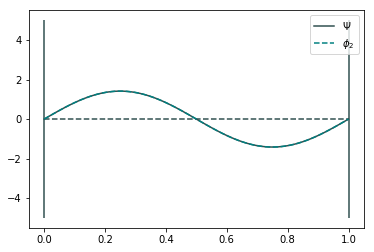

In [8]:
#plot the box
plt.hlines(y=0,xmin=0,xmax=L,linestyle = "--",color="darkslategrey")
plt.vlines(x=0,ymin=-5,ymax=5,color="darkslategrey")
plt.vlines(x=L,ymin=-5,ymax=5,color="darkslategrey")

#plot a linear combination of states
plt.plot(x, phi(2,x), label = "$\Psi$",color = "darkslategrey")
plt.plot(x, phi(2,x), linestyle = "--",label = "$\phi_{2}$",color = "teal")
plt.legend()

What if this function were less "nice"?


### Exercise 1: Triangular sawtooth function

\begin{equation}
\Psi(x) = \begin{cases} 
      0 & x < 0 \\
      x & 0\leq x\leq \frac{L}{2}\\
      L-x & \frac{L}{2}\leq x\leq L\\
      0 & x > L
   \end{cases}
\end{equation}

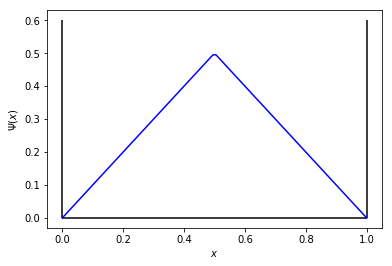

In [9]:
#set the length of the box
L = 1.

#define x
x = np.linspace(0,L,100)

#define the sawtooth function
def sawtooth(x,L):
  s = np.zeros_like(x)
  s[0:len(x)/2] = x[0:len(x)/2]
  s[len(x)/2:] = L*np.ones_like(x[len(x)/2:]) - x[len(x)/2:]
  return s

#plot the box
plt.hlines(y=0,xmin=0.,xmax=L,color="black")
plt.vlines(x=0,ymin=0.,ymax=0.6,color="black")
plt.vlines(x=L,ymin=0.,ymax =0.6,color="black")

#plot the function
plt.plot(x,sawtooth(x,L),color = "blue")

plt.ylabel("$\Psi(x)$")
plt.xlabel("$x$")
plt.show()

Start by approximating the sawtooth as a sine:
\begin{equation}
\Psi(x) \approx \sin(\pi x/a)
\end{equation}

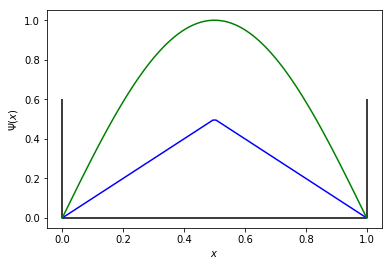

In [10]:
#define our approximation function
def saw_approx(x,L):
  return np.sin(np.pi*x/L)

#plot the box
plt.hlines(y=0,xmin=0.,xmax=L,color="black")
plt.vlines(x=0,ymin=0.,ymax=0.6,color="black")
plt.vlines(x=L,ymin=0.,ymax =0.6,color="black")

#plot the function
plt.plot(x,sawtooth(x,L),color = "blue")
plt.plot(x,saw_approx(x,L),color = "green")
plt.ylabel("$\Psi(x)$")
plt.xlabel("$x$")
plt.show()

How would you adjust this to make it a better approximation?

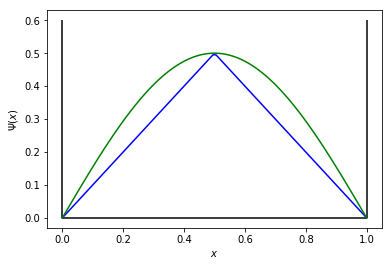

In [11]:
#define our approximation function
def new_saw_approx(x,L):
  return (L/2)*np.sin(np.pi*x/L)
  

#plot the box
plt.hlines(y=0,xmin=0.,xmax=L,color="black")
plt.vlines(x=0,ymin=0.,ymax=0.6,color="black")
plt.vlines(x=L,ymin=0.,ymax =0.6,color="black")

#plot the function
plt.plot(x,sawtooth(x,L),color = "blue")
plt.plot(x,new_saw_approx(x,L),color = "green")
plt.ylabel("$\Psi(x)$")
plt.xlabel("$x$")
plt.show()

How else might you improve this?

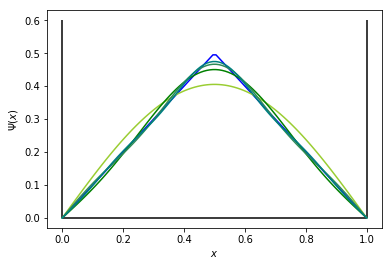

In [12]:
#define our approximation function
def A_n(n):
  if n%2 == 0:
    return 0
  else:
    return np.sqrt(L/2.)*np.power(-1,(n-1)/2)*4/(np.pi*n)**2
  
def series_saw_approx(x,L,nmax):
  temp = np.zeros_like(x)
  for n in xrange(1,nmax+1):
    temp += A_n(n)*np.sqrt(2./L)*np.sin(np.pi*x*n/L)
  return temp

#plot the box
plt.hlines(y=0,xmin=0.,xmax=L,color="black")
plt.vlines(x=0,ymin=0.,ymax=0.6,color="black")
plt.vlines(x=L,ymin=0.,ymax =0.6,color="black")

#plot the function
plt.plot(x,sawtooth(x,L),color = "blue")
plt.plot(x,series_saw_approx(x,L,1),color = "yellowgreen")
plt.plot(x,series_saw_approx(x,L,3),color = "green")
plt.plot(x,series_saw_approx(x,L,5),color = "seagreen")
plt.plot(x,series_saw_approx(x,L,7),color = "teal")
plt.ylabel("$\Psi(x)$")
plt.xlabel("$x$")
plt.show()

What happens if you subtract off one of the basis functions in the sum? What happens to the approximation?

**Optional:** plot the coefficients $A_{n}$ as a function of $n$.

### Exercise 2: Step function

\begin{equation}
\Psi(x) = \begin{cases} 
      0 & x < \frac{L}{4}\\
      1 & \frac{L}{4}\leq x\leq \frac{3 L}{4}\\
      0 & x > L
   \end{cases}
\end{equation}

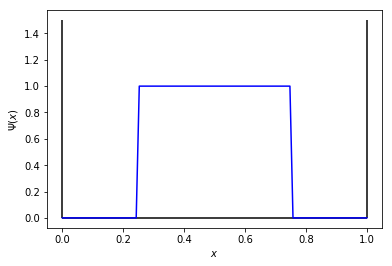

In [13]:
#set the length of the box
L = 1.

#define x
x = np.linspace(0,L,100)

#define the step function
def step_func(x,L):
  s = np.zeros_like(x)
  s[len(x)/4:3*len(x)/4] = np.ones_like(x[len(x)/4:3*len(x)/4])
  return s

#plot the box
plt.hlines(y=0,xmin=0.,xmax=L,color="black")
plt.vlines(x=0,ymin=0.,ymax=1.5,color="black")
plt.vlines(x=L,ymin=0.,ymax =1.5,color="black")

#plot the function
plt.plot(x,step_func(x,L),color = "blue")

plt.ylabel("$\Psi(x)$")
plt.xlabel("$x$")
plt.show()

How can we approximate this function using the basis vectors we have already derived?

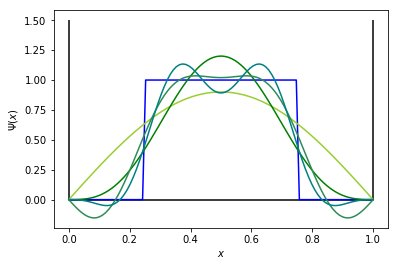

In [14]:
#define the approximation function
def B_n(n):
  if n%2 == 0:
    return 0
  else:
    return (np.sqrt(2.*L)/(n*np.pi))*(np.cos(n*np.pi/4.)-np.cos(3*n*np.pi/4.))

def series_step_approx(x,L,nmax):
  temp = np.zeros_like(x)
  for n in xrange(1,nmax+1):
    temp += B_n(n)*np.sqrt(2./L)*np.sin(np.pi*x*n/L)
  return temp

#plot the box
plt.hlines(y=0,xmin=0.,xmax=L,color="black")
plt.vlines(x=0,ymin=0.,ymax=1.5,color="black")
plt.vlines(x=L,ymin=0.,ymax =1.5,color="black")

#plot the function
plt.plot(x,step_func(x,L),color = "blue")
plt.plot(x,series_step_approx(x,L,1),color = "yellowgreen")
plt.plot(x,series_step_approx(x,L,3),color = "green")
plt.plot(x,series_step_approx(x,L,5),color = "seagreen")
plt.plot(x,series_step_approx(x,L,7),color = "teal")
plt.ylabel("$\Psi(x)$")
plt.xlabel("$x$")
plt.show()

#BONUS MATERIAL: Orthogonal Polynomials and Defining an Inner Product

What are the Hermite polynomials?

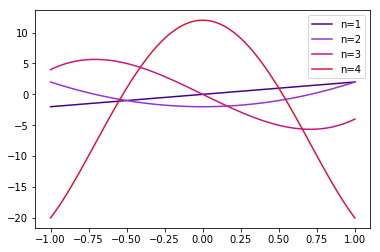

In [15]:
#from numpy.polynomial import hermite

#from mpmath import *
#from sympy import *

from scipy.special import eval_hermite

#define x
x = np.linspace(-1.,1.,100)

#plot the first 4 Hermite polynomials:
plt.plot(x,eval_hermite(1,x),label = "n=1",color ="indigo")
plt.plot(x,eval_hermite(2,x),label = "n=2",color ="darkorchid")
plt.plot(x,eval_hermite(3,x),label = "n=3",color ="mediumvioletred")
plt.plot(x,eval_hermite(4,x),label = "n=4",color ="crimson")
plt.legend()

What happens when you try to do the inner product of two Hermite polynomials without the weight? (lack of convergence?)

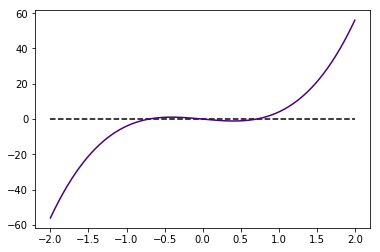

In [18]:
def inner_product(n,m):
  return eval_hermite(n,x)*eval_hermite(m,x)

#define x
x0 = -2.
xf = 2.
x = np.linspace(x0,xf,10000)

#plot integrand
plt.hlines(y=0,xmin=x0,xmax=xf,linestyle = "--",color="black")
plt.plot(x,inner_product(1,2),color ="indigo")
plt.show()

Is this finite? (change the space, x, that you evaluate the function on)

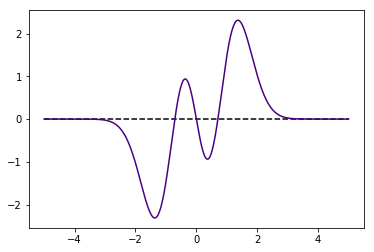

In [19]:
def better_inner_product(n,m):
  return eval_hermite(n,x)*eval_hermite(m,x)*np.exp(-x**2)

#define x
x0 = -5.
xf = 5.
x = np.linspace(x0,xf,10000)

#plot integrand
plt.hlines(y=0,xmin=x0,xmax=xf,linestyle = "--",color="black")
plt.plot(x,better_inner_product(1,2),color ="indigo")
plt.show()


For those interested (this is absolutely not required or expected): https://arxiv.org/pdf/1901.01648.pdf